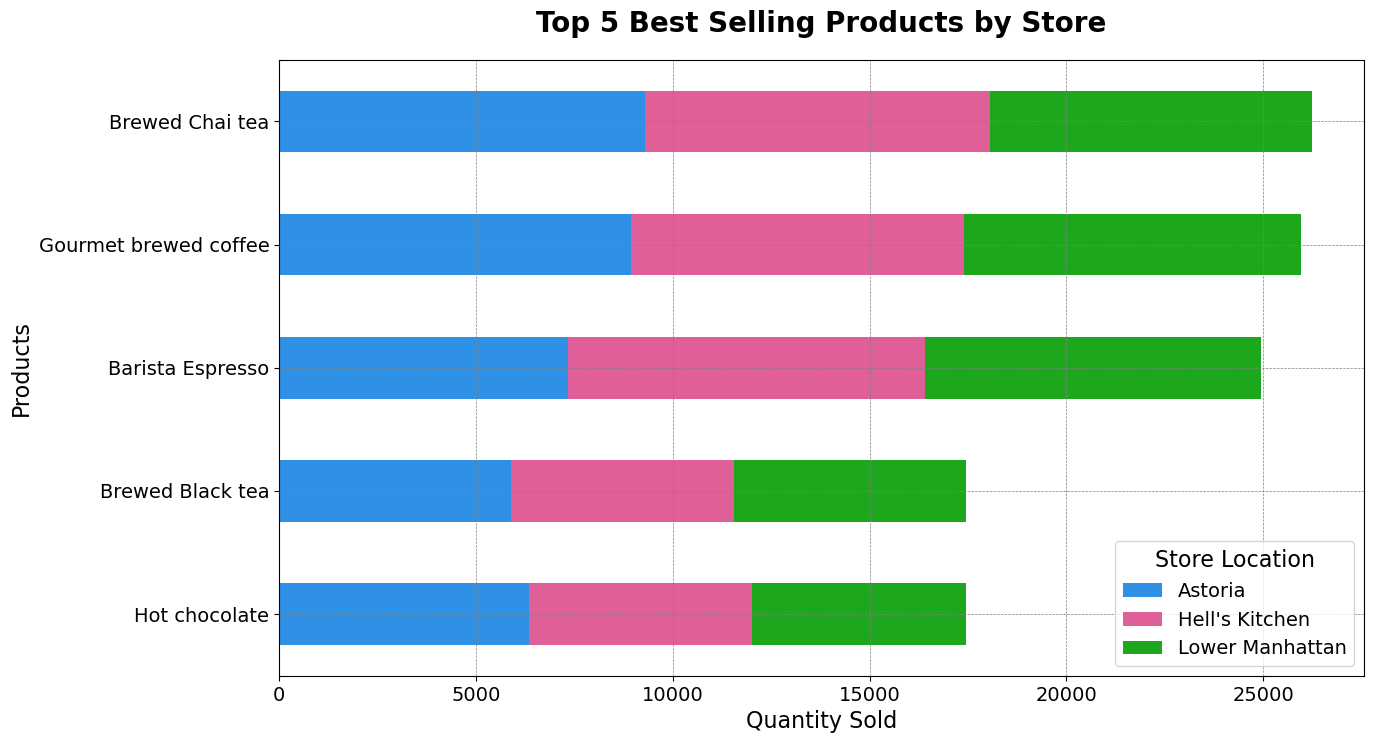

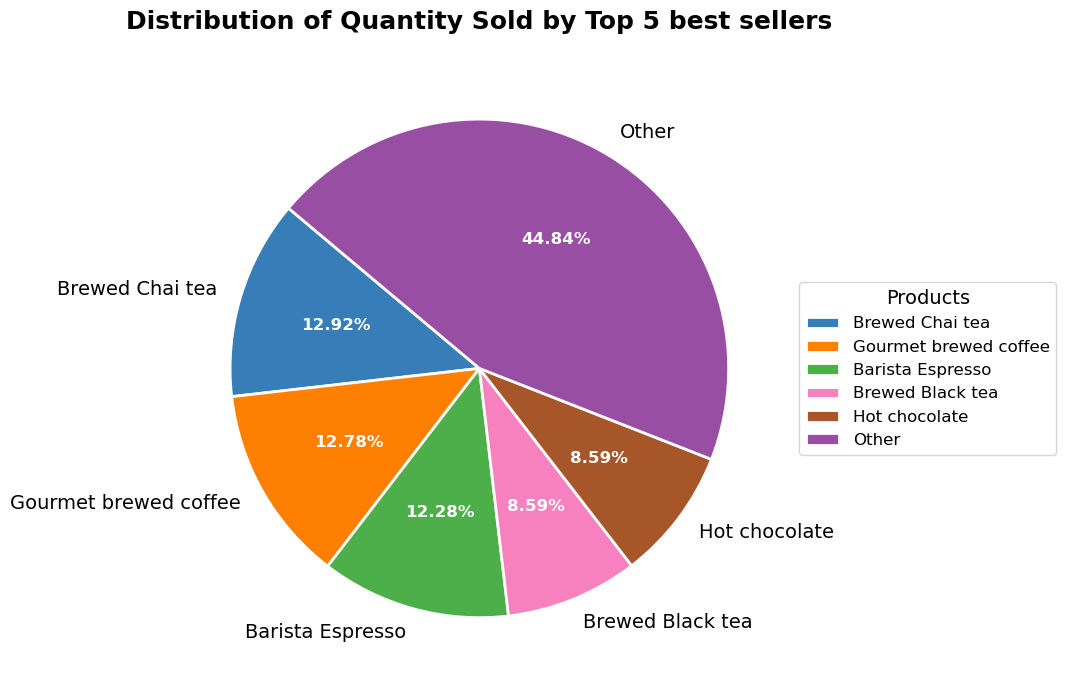

final_cup_size_category          Lg      Rg      Sm
product_detail                                     
Brazilian Lg                 4317.0     0.0     0.0
Brazilian Rg                    0.0  4385.0     0.0
Brazilian Sm                    0.0     0.0  4310.0
Cappuccino                      0.0     0.0  4266.0
Cappuccino Lg                4151.0     0.0     0.0
Columbian Medium Roast Lg    4195.0     0.0     0.0
Columbian Medium Roast Rg       0.0  4547.0     0.0
Columbian Medium Roast Sm       0.0     0.0  4178.0
Espresso shot                  76.0  1283.0  1371.0
Ethiopia Lg                  4227.0     0.0     0.0
Ethiopia Rg                     0.0  4393.0     0.0
Ethiopia Sm                     0.0     0.0  4433.0
Jamaican Coffee River Lg     4395.0     0.0     0.0
Jamaican Coffee River Rg        0.0  4018.0     0.0
Jamaican Coffee River Sm        0.0     0.0  4018.0
Latte                           0.0     0.0  4602.0
Latte Rg                        0.0  4497.0     0.0
Our Old Time

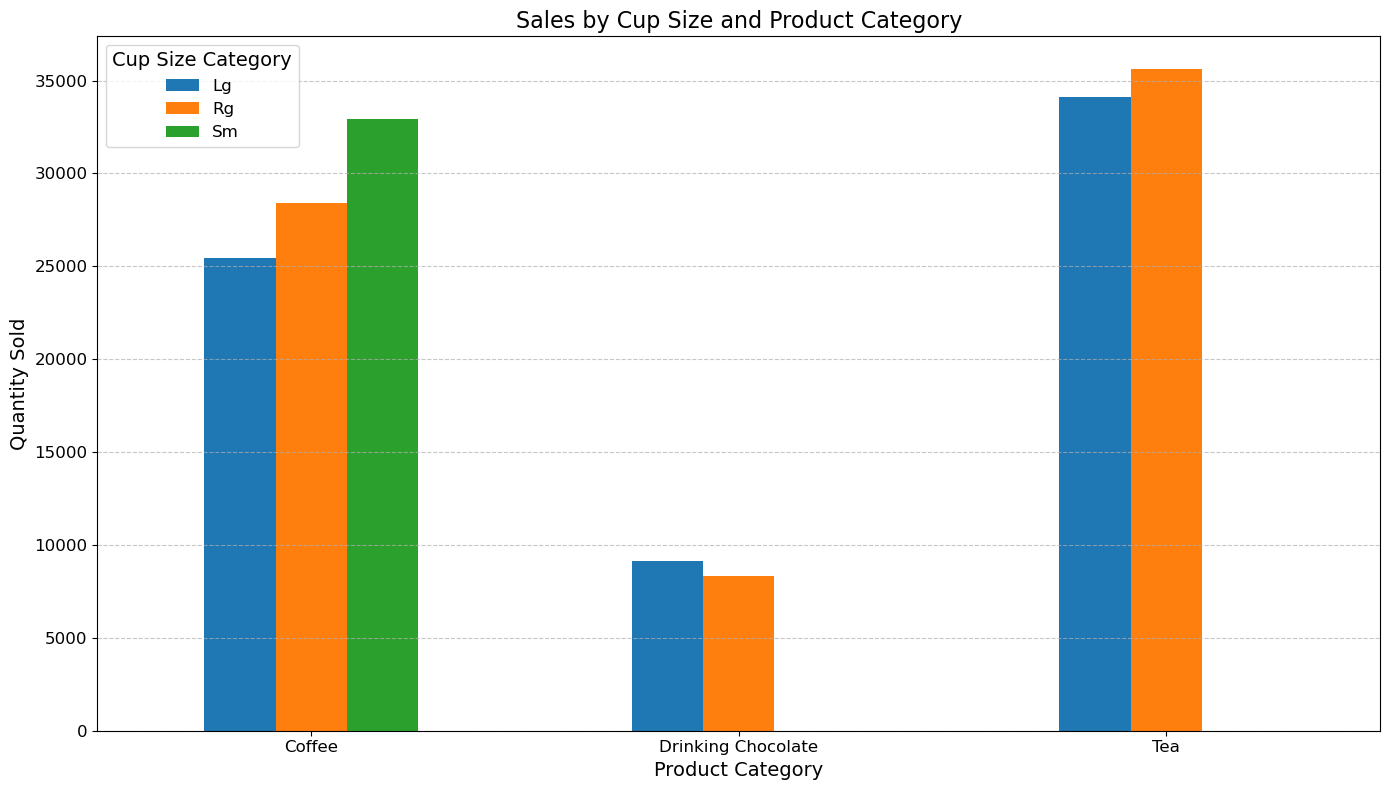

In [2]:
#import all the library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Load database -- this need to work with team members
file_path = '/Users/ginny/Documents/GitHub/team_project/data/raw/Coffee_Shop_Sales.csv'
data = pd.read_csv(file_path)

# get the total qty group by stores
product_location_qty = data.groupby(['product_type', 'store_location'])['transaction_qty'].sum().reset_index()

# Group by product_type to get the total quantity sold for each product type
total_qty_by_product = product_location_qty.groupby('product_type')['transaction_qty'].sum().reset_index()


# get the top 5  best selling products
top_5_product_types = total_qty_by_product.sort_values(by='transaction_qty', ascending=False).head(5)['product_type']

# get the sold qty of the top five best selling products
filtered_data = product_location_qty[product_location_qty['product_type'].isin(top_5_product_types)]

# get the pivoted data :store locations and sold qty as columns, index as prodcut
pivoted_data = filtered_data.pivot(index='product_type', columns='store_location', values='transaction_qty').fillna(0)

# Sort the data by the total from high to low
pivoted_data['total_qty'] = pivoted_data.sum(axis=1)
pivoted_data_sorted = pivoted_data.sort_values(by='total_qty', ascending=True)
pivoted_data_sorted = pivoted_data_sorted.drop(columns='total_qty')

custom_colors = ['#2E91E5', '#E15F99', '#1CA71C', '#FB0D0D', '#DA16FF']

# Plot the horizontal stacked bar chart with enhancements
pivoted_data_sorted.plot(kind='barh', stacked=True, figsize=(14, 8), color=custom_colors)

# plot the graph with some cretivity
plt.title('Top 5 Best Selling Products by Store', fontsize=20, fontweight='bold',pad=20)
plt.xlabel('Quantity Sold', fontsize=16)
plt.ylabel('Products', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Store Location', fontsize=14, title_fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()

# Remove rows where product_type is "Flavours" becase they are not products sold
#also remove the branded because they are merchandise,not include in the food sales analysis
data = data[data['product_category'] != 'Flavours']
data = data[data['product_category'] != 'Branded']

# now calculate the total quantity sold for each product type after remove the two categories
#used sales now in case of duplicate- but the sales is not in dollar value
total_sales_by_product = data.groupby('product_type')['transaction_qty'].sum().reset_index()

# sort the top five best selling products
top_5_product_sales = total_sales_by_product.sort_values(by='transaction_qty', ascending=False).head(5)

# Calculate the total quantity sold for all products
total_sales = total_sales_by_product['transaction_qty'].sum()

# Calculate the percentage of the new total sales for the top 5 product types
top_5_product_sales['percentage'] = (top_5_product_sales['transaction_qty'] / total_sales) * 100

# Calculate the percentage of sales for other products
other_sales = total_sales - top_5_product_sales['transaction_qty'].sum()
other_percentage = (other_sales / total_sales) * 100

# replace the rest of the products with "other"
other_row = pd.DataFrame({'product_type': ['Other'], 'transaction_qty': [other_sales], 'percentage': [other_percentage]})
top_5_product_sales = pd.concat([top_5_product_sales, other_row], ignore_index=True)

custom_colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999']#color blind friendly

# Create a pie chart
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(
    top_5_product_sales['percentage'],
    labels=top_5_product_sales['product_type'],
    autopct='%1.2f%%', # two decimals
    colors=custom_colors, #use my customized colors
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
plt.setp(autotexts, size=12, weight="bold", color="white")
plt.setp(texts, size=14)
plt.title('Distribution of Quantity Sold by Top 5 best sellers', fontsize=18, fontweight='bold', pad=20)
plt.legend(wedges, top_5_product_sales['product_type'], title="Products", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

# map the cup details with the cup size, if appliable
cup_size_mapping = {
    'Ethiopia Rg': 'Rg',
    'Spicy Eye Opener Chai Lg': 'Lg',
    'Dark chocolate Lg': 'Lg',
    'Our Old Time Diner Blend Sm': 'Sm',
    'Columbian Medium Roast Sm': 'Sm',
    'Latte Rg': 'Rg',
    'Dark chocolate Rg': 'Rg',
    'Spicy Eye Opener Chai Rg': 'Rg',
    'Ethiopia Lg': 'Lg',
    'Earl Grey Lg': 'Lg',
    'Serenity Green Tea Lg': 'Lg',
    'Lemon Grass Rg': 'Rg',
    'Sustainably Grown Organic Lg': 'Lg',
    'Cappuccino': 'Sm',
    'Lemon Grass Lg': 'Lg',
    'Peppermint Lg': 'Lg',
    'Latte': 'Sm',
    'Brazilian Rg': 'Rg',
    'Brazilian Lg': 'Lg',
    'Columbian Medium Roast Rg': 'Rg',
    'Morning Sunrise Chai Rg': 'Rg',
    'Morning Sunrise Chai Lg': 'Lg',
    'Our Old Time Diner Blend Lg': 'Lg',
    'Sustainably Grown Organic Rg': 'Rg',
    'Peppermint Rg': 'Rg',
    'English Breakfast Rg': 'Rg',
    'Our Old Time Diner Blend Rg': 'Rg',
    'Serenity Green Tea Rg': 'Rg',
    'Brazilian Sm': 'Sm',
    'Jamaican Coffee River Sm': 'Sm',
    'Jamaican Coffee River Lg': 'Lg',
    'Traditional Blend Chai Lg': 'Lg',
    'Cappuccino Lg': 'Lg',
    'Earl Grey Rg': 'Rg',
    'Jamaican Coffee River Rg': 'Rg',
    'Ethiopia Sm': 'Sm',
    'English Breakfast Lg': 'Lg',
    'Traditional Blend Chai Rg': 'Rg',
    'Columbian Medium Roast Lg': 'Lg'
}

# define the cup size just for shots
def determine_shot_cup_size(row):
    if row['product_detail'] in ['Espresso shot', 'Ouro Brasileiro shot']:
        if row['transaction_qty'] == 1:
            return 'Sm'
        elif row['transaction_qty'] == 2:
            return 'Rg'
        elif row['transaction_qty'] >= 3:
            return 'Lg'
    return None


# Apply the mapping only for shots
data['shot_cup_size_category'] = data.apply(determine_shot_cup_size, axis=1)

# Apply the major mapping
data['cup_size_category'] = data['product_detail'].map(cup_size_mapping)


# Combine the two cup size together
data['final_cup_size_category'] = data['shot_cup_size_category'].combine_first(data['cup_size_category'])

# Count the order with multiple shots as one order
data.loc[data['product_detail'].isin(['Espresso shot', 'Ouro Brasileiro shot']), 'transaction_qty'] = 1

# Filter the coffe category as I want to manually check if the coffee resizing of shots worked,and print out the result
coffee_category_data = data[data['product_category'] == 'Coffee']
coffee_cup_size_sales = coffee_category_data.groupby(['final_cup_size_category', 'product_detail'])['transaction_qty'].sum().reset_index()
pivoted_coffee_cup_size_sales = coffee_cup_size_sales.pivot(index='product_detail', columns='final_cup_size_category', values='transaction_qty').fillna(0)
print(pivoted_coffee_cup_size_sales)

# #draw plot
pivoted_cup_size_sales = data.pivot_table(values='transaction_qty', index='product_category', columns='final_cup_size_category', aggfunc='sum') # Use 'data' instead of 'df' and use the correct column names
pivoted_cup_size_sales.plot(kind='bar', figsize=(14, 8))
plt.title('Sales by Cup Size and Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Cup Size Category',fontsize=12, title_fontsize=14)
plt.tight_layout() # Adjusting layout
plt.show()


